## Libraries

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro  
import plotly.graph_objects as go   
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import re

## Import csv

In [715]:
sportsbetting=pd.read_excel("Data\sports.xlsx")                    # .csv upload
sportsbetting.head()

Sport  Wager  Paid  Winnings  Hold  Purchase_Time         Competition  \
0  Baloncesto   1.00   0.0      1.00   1.0      Unchecked  Germany Bundesliga   
1  Baloncesto  42.52   0.0     42.52   1.0      Unchecked  Germany Bundesliga   
2  Baloncesto   7.03   0.0      7.03   1.0      Unchecked  Germany Bundesliga   
3  Baloncesto   4.20   0.0      4.20   1.0        Checked  Germany Bundesliga   
4  Baloncesto   2.50   0.0      2.50   1.0        Checked  Germany Bundesliga   

                                 Event Event_Date      Time  
0           Alba Berlín - BG Gottingen 2024-02-13       NaN  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03       NaN  
2         Alba Berlín - Ratiopharm Ulm 2024-02-04       NaN  
3     Alba Berlin - S. Oliver Wurzburg 2024-01-14       NaN  
4           Baskets Bonn - Alba Berlin 2024-01-21  20:00:00

## DataFrame Shape and Size

In [716]:
sportsbetting.info()                                        # 4 float columns, 4 object and 1 datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23607 entries, 0 to 23606
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sport           23607 non-null  object        
 1   Wager           23607 non-null  float64       
 2   Paid            23607 non-null  float64       
 3   Winnings        23607 non-null  float64       
 4   Hold            23607 non-null  float64       
 5    Purchase_Time  23607 non-null  object        
 6   Competition     23607 non-null  object        
 7    Event          23607 non-null  object        
 8   Event_Date      23607 non-null  datetime64[ns]
 9   Time            22297 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 1.8+ MB


In [717]:
sportsbetting.drop_duplicates()                           # Clean duplicates, in this cases there was no duplicates on de DataFrame

Sport  Wager  Paid  Winnings  Hold  Purchase_Time  \
0      Baloncesto   1.00   0.0      1.00   1.0      Unchecked   
1      Baloncesto  42.52   0.0     42.52   1.0      Unchecked   
2      Baloncesto   7.03   0.0      7.03   1.0      Unchecked   
3      Baloncesto   4.20   0.0      4.20   1.0        Checked   
4      Baloncesto   2.50   0.0      2.50   1.0        Checked   
...           ...    ...   ...       ...   ...            ...   
23602   Waterpolo   0.26   0.0      0.26   1.0      Unchecked   
23603   Waterpolo   0.16   0.0      0.16   1.0      Unchecked   
23604   Waterpolo   0.30   0.0      0.30   1.0        Checked   
23605   Waterpolo   0.16   0.0      0.16   1.0      Unchecked   
23606   Waterpolo   0.26   0.0      0.26   1.0      Unchecked   

                          Competition                                Event  \
0                  Germany Bundesliga           Alba Berlín - BG Gottingen   
1                  Germany Bundesliga  Alba Berlín - EWE Baskets Oldenburg   
2                  Germany Bundesliga         Alba Berlín - Ratiopharm Ulm   
3                  Germany Bundesliga     Alba Berlin - S. Oliver Wurzburg   
4                  Germany Bundesliga           Baskets Bonn - Alba Berlin   
...                               ...                                  ...   
23602   Campeonato del Mundo Femenino                China - Nueva Zelanda   
23603   Campeonato del Mundo Femenino             Reino Unido - Kazajistán   
23604  Campeonato del Mundo Masculino                      Grecia - Italia   
23605  Campeonato del Mundo Masculino                    Hungría - Francia   
23606  Campeonato del Mundo Masculino                     Serbia - Croacia   

      Event_Date      Time  
0     2024-02-13       NaN  
1     2024-03-03       NaN  
2     2024-02-04       NaN  
3     2024-01-14       NaN  
4     2024-01-21  20:00:00  
...          ...       ...  
23602 2024-02-14       NaN  
23603 2024-02-14  10:00:00  
23604 2024-02-13  18:00:00  
23605 2024-02-13  18:05:00  
23606 2024-02-13  11:00:00  

[23607 rows x 10 columns]

## Columns query & Blank spaces cleaning

In [718]:
sportsbetting.columns                                                  # Columns "Purchase Time" and "Event" contain blanks before letters

Index(['Sport', 'Wager', 'Paid', 'Winnings', 'Hold', ' Purchase_Time',
       'Competition', ' Event', 'Event_Date', 'Time'],
      dtype='object')

In [719]:
sportsbetting.columns=sportsbetting.columns.str.strip()               # strip() removes leading and trailing blanks from each string in the column names 

In [720]:
sportsbetting.columns                                                 # Fixed column names

Index(['Sport', 'Wager', 'Paid', 'Winnings', 'Hold', 'Purchase_Time',
       'Competition', 'Event', 'Event_Date', 'Time'],
      dtype='object')

## Statistics

In [721]:
sportsbetting.describe().round(2)                                   

Wager      Paid  Winnings      Hold
count  23607.00  23607.00  23607.00  23607.00
mean      42.83     36.02      6.81      0.26
std      191.47    277.85    237.10      8.69
min        0.01      0.00 -17459.25   -785.10
25%        0.60      0.00      0.07      0.69
50%        2.85      0.00      1.10      1.00
75%       18.74      0.85      8.33      1.00
max     7068.37  20916.00   7045.65      1.00

In [722]:
sportsbetting.describe().round(2).T                             # The standard deviation of Wager, Paid and Winnings is high. There is a wide range of amounts wagered, paid and won.
                                                                # Wager and Paid averages are affected by the large variety of values in each column and by the maxima. 
                                                                # The mean of these columns is well above 75% of the column values.

count   mean     std       min   25%   50%    75%       max
Wager     23607.0  42.83  191.47      0.01  0.60  2.85  18.74   7068.37
Paid      23607.0  36.02  277.85      0.00  0.00  0.00   0.85  20916.00
Winnings  23607.0   6.81  237.10 -17459.25  0.07  1.10   8.33   7045.65
Hold      23607.0   0.26    8.69   -785.10  0.69  1.00   1.00      1.00

In [723]:
wager_median=sportsbetting["Wager"].median()                     # Querying the median of numeric columns
paid_median=sportsbetting["Paid"].median()
winnings_median=sportsbetting["Winnings"].median()
hold_median=sportsbetting["Hold"].median()

print(wager_median)
print(paid_median)
print(winnings_median)
print(hold_median)

2.85
0.0
1.1
1.0


In [724]:
mean = np.mean(sportsbetting)                                 #Querying the variance of the numeric columns
variance= np.var(sportsbetting,ddof=1)
variance

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-pack

Wager       36660.837573
Paid        77200.924874
Winnings    56217.033251
Hold           75.586061
dtype: float64

Notes:

- The values in the numerical columns are highly dispersed around the mean. 
- The "Hold" column shows the least dispersion.

## Study of variables

### Numeric variables: Graphs

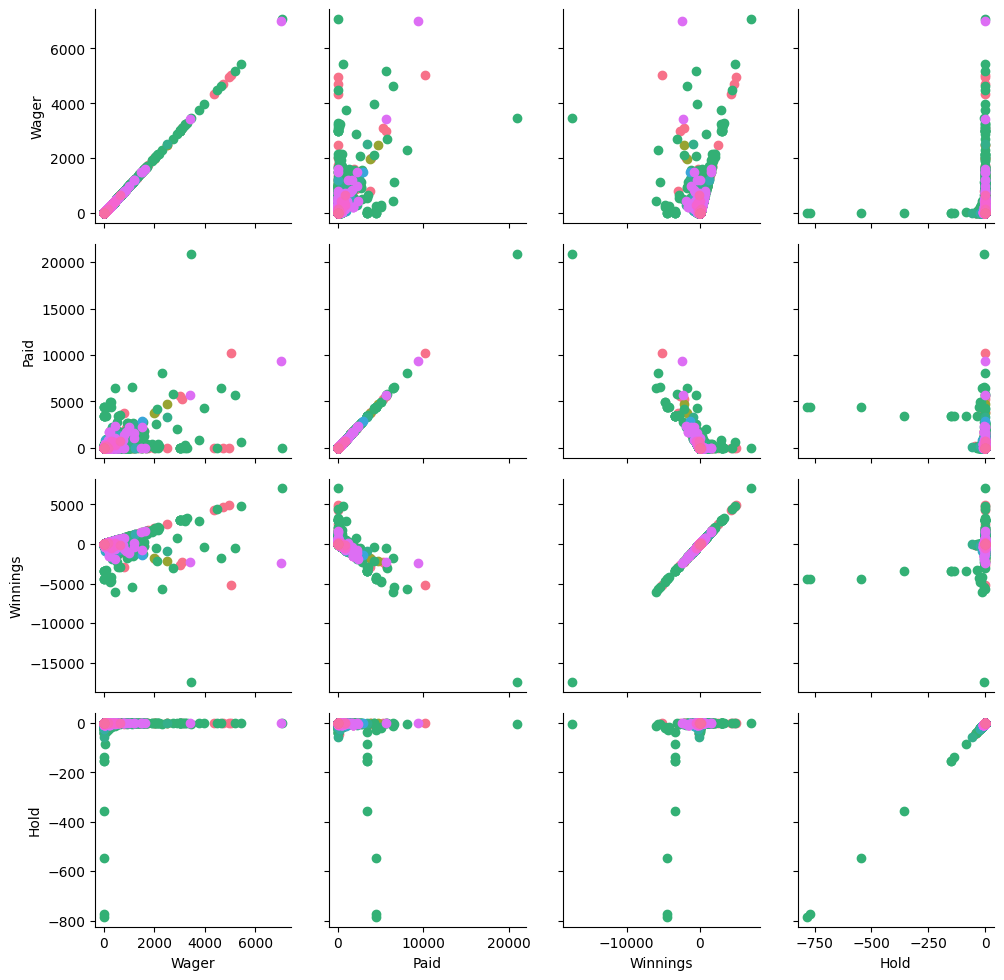

In [726]:
g=sns.PairGrid(sportsbetting, hue="Sport")
g.map(plt.scatter)

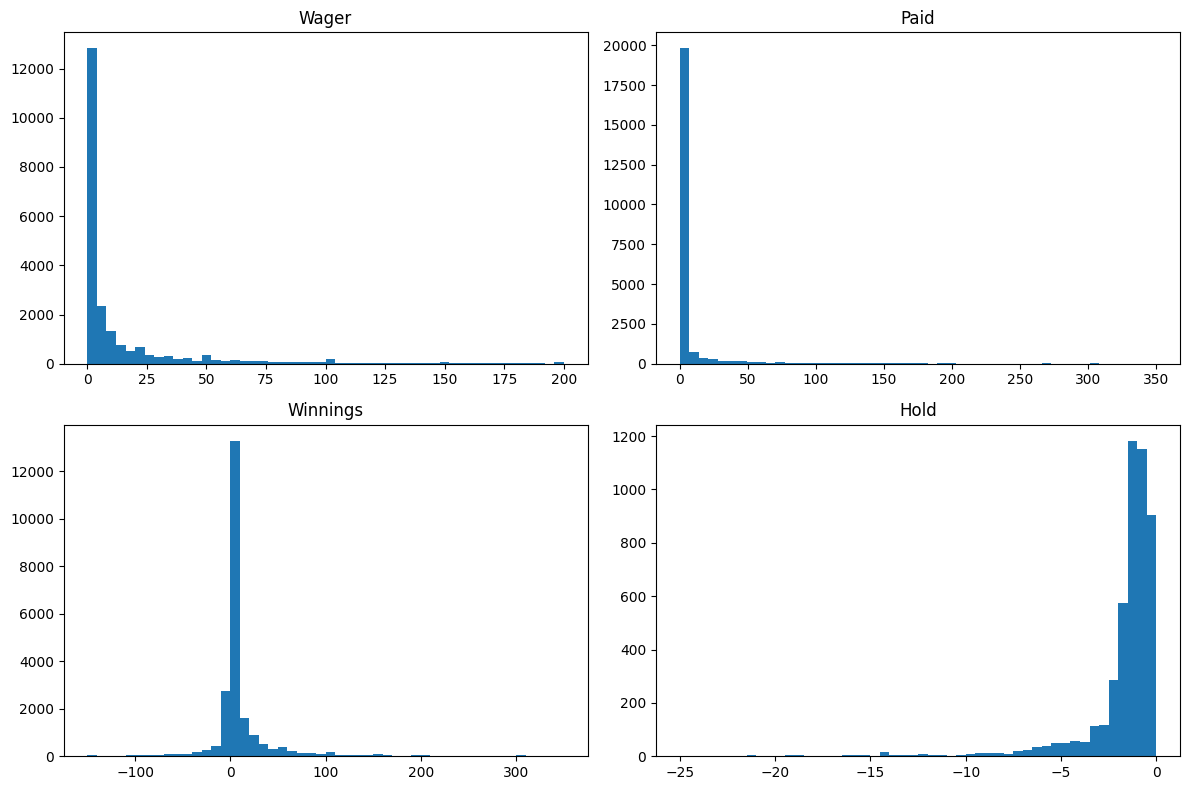

In [645]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# "Wager" histogram
axs[0, 0].hist(sportsbetting["Wager"], bins=50,range=[0,200])
axs[0, 0].set_title("Wager")

# "Paid" histogram
axs[0, 1].hist(sportsbetting["Paid"], bins=50,range=[0,350])
axs[0, 1].set_title("Paid")

# "Winnings" histogram
axs[1, 0].hist(sportsbetting["Winnings"], bins=50, range=[-150,350])
axs[1, 0].set_title("Winnings")

# "Hold" histogram
axs[1, 1].hist(sportsbetting["Hold"], bins=50,range=[-25,0])
axs[1, 1].set_title("Hold")

plt.tight_layout()                          #Automatic adjusting design to avoid overlaps between the different grahps's elements 
plt.show()

### Numeric variables: Normality Test

Notes: 

- At first glance we can rule out that the "Wager", "Paid" and "Hold" columns follow a normal distribution. 
- The "Winnings" column is the only one likely to follow a normal distribution.
- A normality test is then carried out to confirm what is seen in the graphs. 
- Finally, none of the numerical variables follow a normal distribution.

In [646]:
from scipy.stats import shapiro                                        


stat, p = shapiro(sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.196, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\278504706.py:4: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [647]:
stat, p = shapiro(sportsbetting["Paid"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.099, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\1923140538.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [648]:
stat, p = shapiro(sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.173, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\4226823057.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [649]:
stat, p = shapiro(sportsbetting["Hold"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.032, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\4000944887.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



### Object variables: Graphs & Adaptations

In [650]:
sportsbetting.head(1)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Baloncesto    1.0   0.0       1.0   1.0     Unchecked  Germany Bundesliga   

                        Event Event_Date Time  
0  Alba Berlín - BG Gottingen 2024-02-13  NaN

#### - "Sport"

In [651]:
sportsbetting["Sport"].unique()

array(['Baloncesto', 'Balonmano', 'Bandy', 'Béisbol', 'Boxeo', 'Caballos',
       'Ciclismo', 'Cricket', 'Dardos', 'Deportes de Invierno',
       'Fórmula 1', 'Fútbol', 'Fútbol Americano', 'Fútbol Sala', 'Galgos',
       'Golf', 'Hockey Hielo', 'Loteria', 'MMA', 'Padel', 'Rugby Union',
       'Snooker', 'Squash', 'Tenis', 'Tenis de Mesa', 'Voleibol',
       'Voley Playa', 'Waterpolo'], dtype=object)

In [652]:
translation = {                                                     # Create dictionary with initial values and final equivalents
    "Baloncesto": "Basketball",
    "Balonmano": "Handball",
    "Bandy": "Bandy",
    "Béisbol": "Baseball",
    "Boxeo": "Boxing",
    "Caballos": "Horse Racing",
    "Ciclismo": "Cycling",
    "Cricket": "Cricket",
    "Dardos": "Darts",
    "Deportes de Invierno": "Winter Sports",
    "Fórmula 1": "Formula 1",
    "Fútbol": "Football",
    "Fútbol Americano": "American Football",
    "Fútbol Sala": "Indoor Football",
    "Galgos": "Greyhound Racing",
    "Golf": "Golf",
    "Hockey Hielo": "Ice Hockey",
    "Loteria": "Lotto",
    "MMA": "MMA",
    "Padel": "Padel",
    "Rugby Union": "Rugby Union",
    "Snooker": "Snooker",
    "Squash": "Squash",
    "Tenis": "Tennis",
    "Tenis de Mesa": "Table Tennis",
    "Voleibol": "Volleyball",
    "Voley Playa": "Beach Volleyball",
    "Waterpolo": "Waterpolo",
    " ": ""   
}

In [653]:
sportsbetting["Sport"] = sportsbetting["Sport"].map(translation)            # "map()" maps the old values of the "Sport" column and converts them to their new value using as reference the created dictionary 
sportsbetting["Sport"].unique()                                             # Check new unique values

array(['Basketball', 'Handball', 'Bandy', 'Baseball', 'Boxing',
       'Horse Racing', 'Cycling', 'Cricket', 'Darts', 'Winter Sports',
       'Formula 1', 'Football', 'American Football', 'Indoor Football',
       'Greyhound Racing', 'Golf', 'Ice Hockey', 'Lotto', 'MMA', 'Padel',
       'Rugby Union', 'Snooker', 'Squash', 'Tennis', 'Table Tennis',
       'Volleyball', 'Beach Volleyball', 'Waterpolo'], dtype=object)

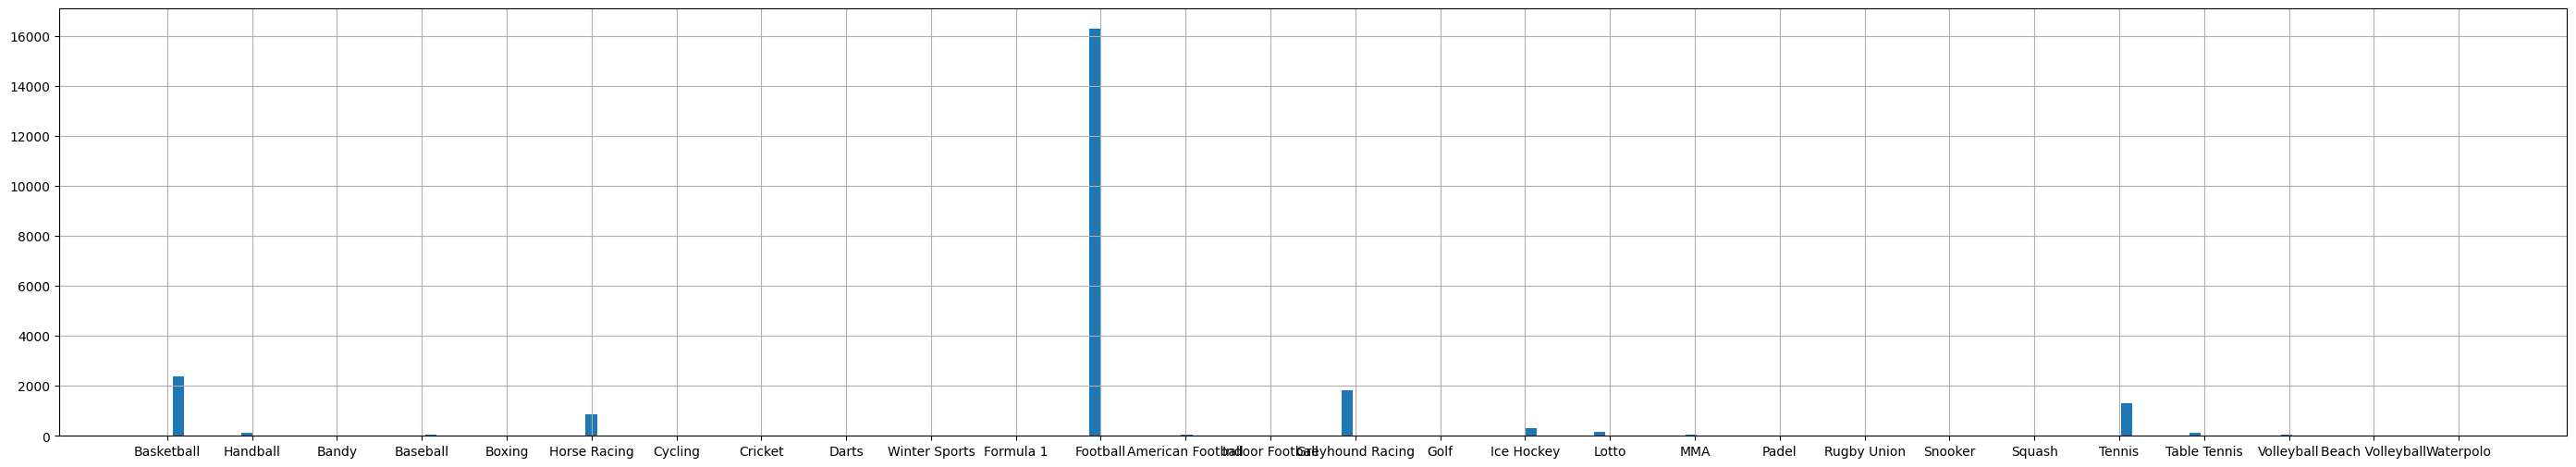

In [654]:
sportsbetting["Sport"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(35, 6)

In [655]:
sportsbetting["Sport"].value_counts()                                                         # Check quantity of each unique value

Football             16273
Basketball            2375
Greyhound Racing      1825
Tennis                1313
Horse Racing           844
Ice Hockey             288
Lotto                  141
Handball               137
Table Tennis           111
American Football       61
Volleyball              51
Baseball                40
MMA                     31
Indoor Football         25
Cricket                 20
Darts                   15
Rugby Union             12
Beach Volleyball         9
Formula 1                7
Golf                     6
Waterpolo                6
Snooker                  5
Padel                    3
Winter Sports            3
Boxing                   2
Cycling                  2
Squash                   1
Bandy                    1
Name: Sport, dtype: int64

In [656]:
((sportsbetting["Sport"].value_counts()/len(sportsbetting["Sport"]))*100).round(2)              # New check in percentages

Football             68.93
Basketball           10.06
Greyhound Racing      7.73
Tennis                5.56
Horse Racing          3.58
Ice Hockey            1.22
Lotto                 0.60
Handball              0.58
Table Tennis          0.47
American Football     0.26
Volleyball            0.22
Baseball              0.17
MMA                   0.13
Indoor Football       0.11
Cricket               0.08
Darts                 0.06
Rugby Union           0.05
Beach Volleyball      0.04
Formula 1             0.03
Golf                  0.03
Waterpolo             0.03
Snooker               0.02
Padel                 0.01
Winter Sports         0.01
Boxing                0.01
Cycling               0.01
Squash                0.00
Bandy                 0.00
Name: Sport, dtype: float64

Notes:

- The sport with the most bets, representing 69%, is Football.
- Football, Basketball, Greyhounds, Tennis and Horses have a sufficiently large number of entries to work with.
- The remaining categories together account for a total of 977 entries. They represent 4.1% of the data. Could be grouped into a single category in a new column.

#### - "Sport_Group", new column

In [657]:
main_sports=["Football", "Basketball", "Greyhound Racing", "Tennis", "Horse Racing"]
sportsbetting["Sport_Group"] = "Other"
sportsbetting.loc[sportsbetting["Sport"].isin(main_sports), "Sport_Group"] = sportsbetting["Sport"]
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0     Unchecked  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0     Unchecked  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

In [658]:
((sportsbetting["Sport_Group"].value_counts()/len(sportsbetting["Sport_Group"]))*100).round(2)   

Football            68.93
Basketball          10.06
Greyhound Racing     7.73
Tennis               5.56
Other                4.14
Horse Racing         3.58
Name: Sport_Group, dtype: float64

<Axes: >

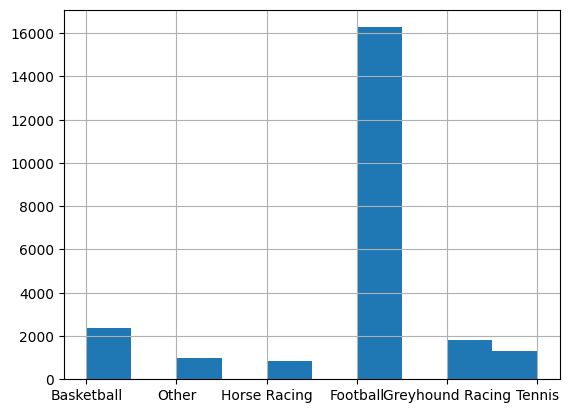

In [659]:
sportsbetting["Sport_Group"].hist()

#### - "Purchase_Time"

In [660]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0     Unchecked  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0     Unchecked  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

In [661]:
sportsbetting["Purchase_Time"].value_counts()

Unchecked    15643
Checked       7964
Name: Purchase_Time, dtype: int64

In [662]:
((sportsbetting["Purchase_Time"].value_counts()/len(sportsbetting["Purchase_Time"]))*100).round(2)

Unchecked    66.26
Checked      33.74
Name: Purchase_Time, dtype: float64

Notes:

- This column refers to the time at which the bet was purchased: before the match or during the match.
- "Unchecked" means "Prematch" and "Checked" means "Live".
- More than half of the bets were bought before the start of the game (unchecked).


In [663]:
change = {
    "Unchecked": "Prematch",
    "Checked": "Live",
    " ": ""
}

sportsbetting["Purchase_Time"] = sportsbetting["Purchase_Time"].map(change)         # Apply "map()" to search and change values
sportsbetting["Purchase_Time"].unique()                                             # Check new unique values

array(['Prematch', 'Live'], dtype=object)

<Axes: >

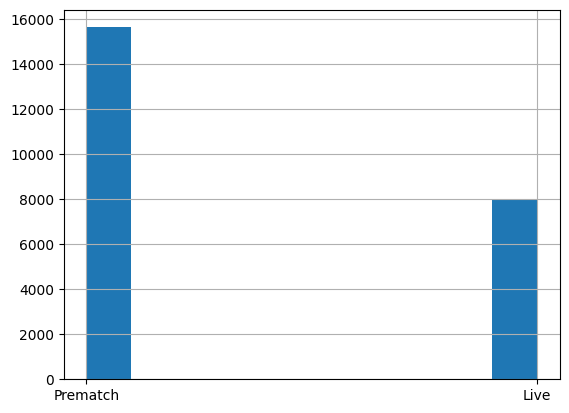

In [664]:
sportsbetting["Purchase_Time"].hist()

#### - "Competition"

In [665]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

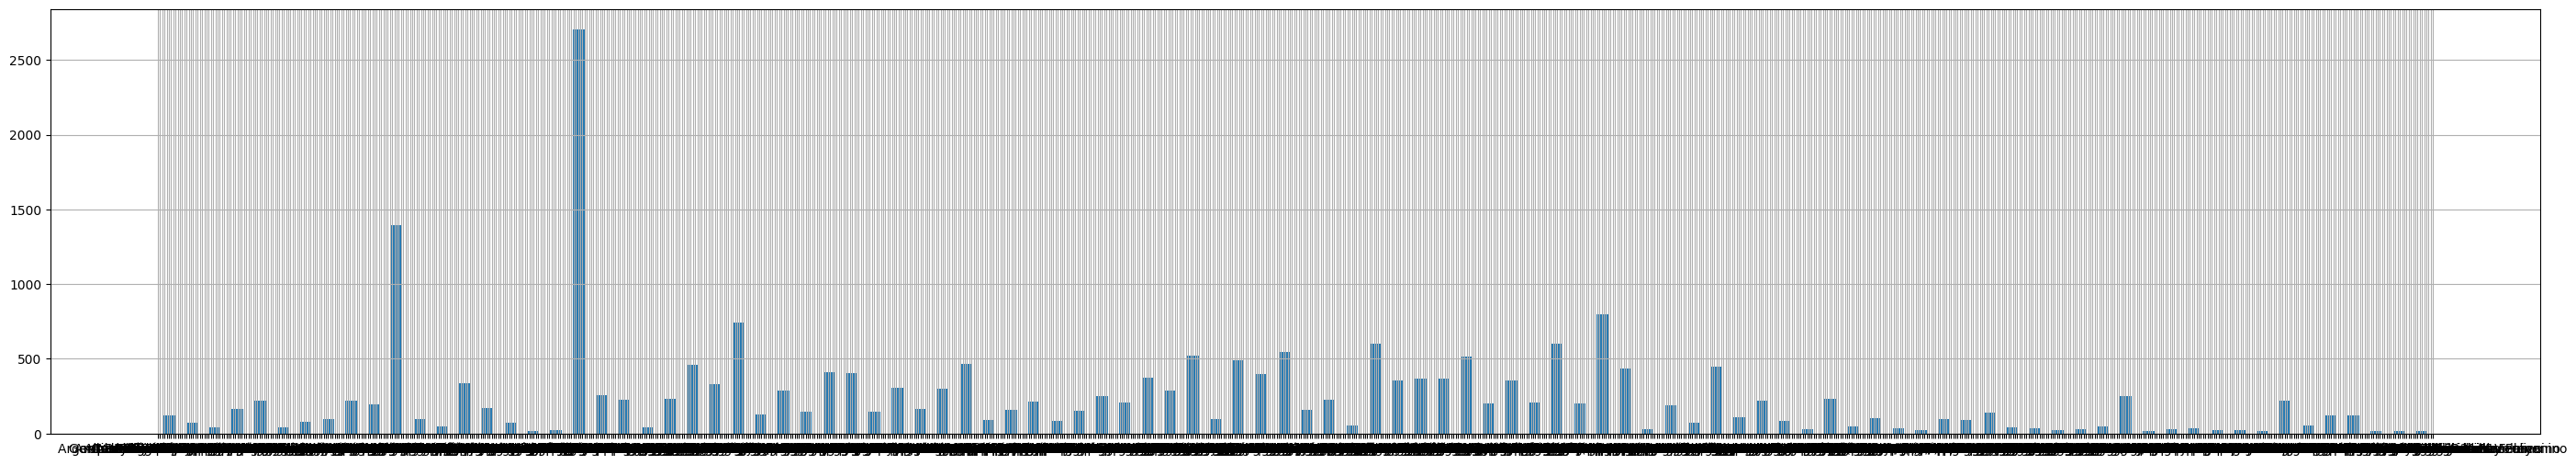

In [666]:
sportsbetting["Competition"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(35, 6)

In [667]:
sportsbetting["Competition"].value_counts()

Carreras del Día                 2669
NBA                               950
Amistosos Clubes                  392
NCAA                              390
LaLiga                            289
                                 ... 
Copa del Rey de Baréin              1
Gimme 5 5/39                        1
Arabia Saudí Liga Premier           1
Fantasy 5 Arizona 5/41              1
Germany Bundesliga 2 Femenina       1
Name: Competition, Length: 1030, dtype: int64

In [668]:
sportsbetting["Competition"].value_counts().unique()

array([2669,  950,  392,  390,  289,  266,  241,  240,  233,  229,  212,
        211,  198,  192,  189,  180,  179,  178,  176,  174,  173,  172,
        169,  163,  162,  159,  155,  151,  147,  145,  143,  136,  134,
        131,  130,  128,  127,  126,  124,  122,  121,  120,  117,  114,
        112,  106,  104,  103,  101,   98,   97,   96,   95,   93,   92,
         90,   86,   85,   80,   79,   77,   76,   75,   72,   71,   70,
         69,   66,   65,   64,   63,   62,   61,   60,   59,   57,   56,
         55,   53,   52,   51,   50,   49,   48,   47,   46,   45,   44,
         43,   42,   41,   40,   39,   38,   36,   35,   34,   33,   32,
         31,   30,   29,   28,   27,   26,   25,   24,   23,   22,   21,
         20,   19,   18,   17,   16,   15,   14,   13,   12,   11,   10,
          9,    8,    7,    6,    5,    4,    3,    2,    1], dtype=int64)

In [669]:
sportsbetting["Competition"].unique()

array(['Germany Bundesliga', 'Germany Bundesliga 2 Pro A',
       'Alemania Copa', ..., 'Pro Tour Doha Femenino',
       'Campeonato del Mundo Femenino', 'Campeonato del Mundo Masculino'],
      dtype=object)

Note:

- The DataFrame presents a very high number of different competitions (1030). 
- The columns "Sport" and "Sport_Group" provide simpler and easier to process and understand data. 

#### - "Event"

In [670]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

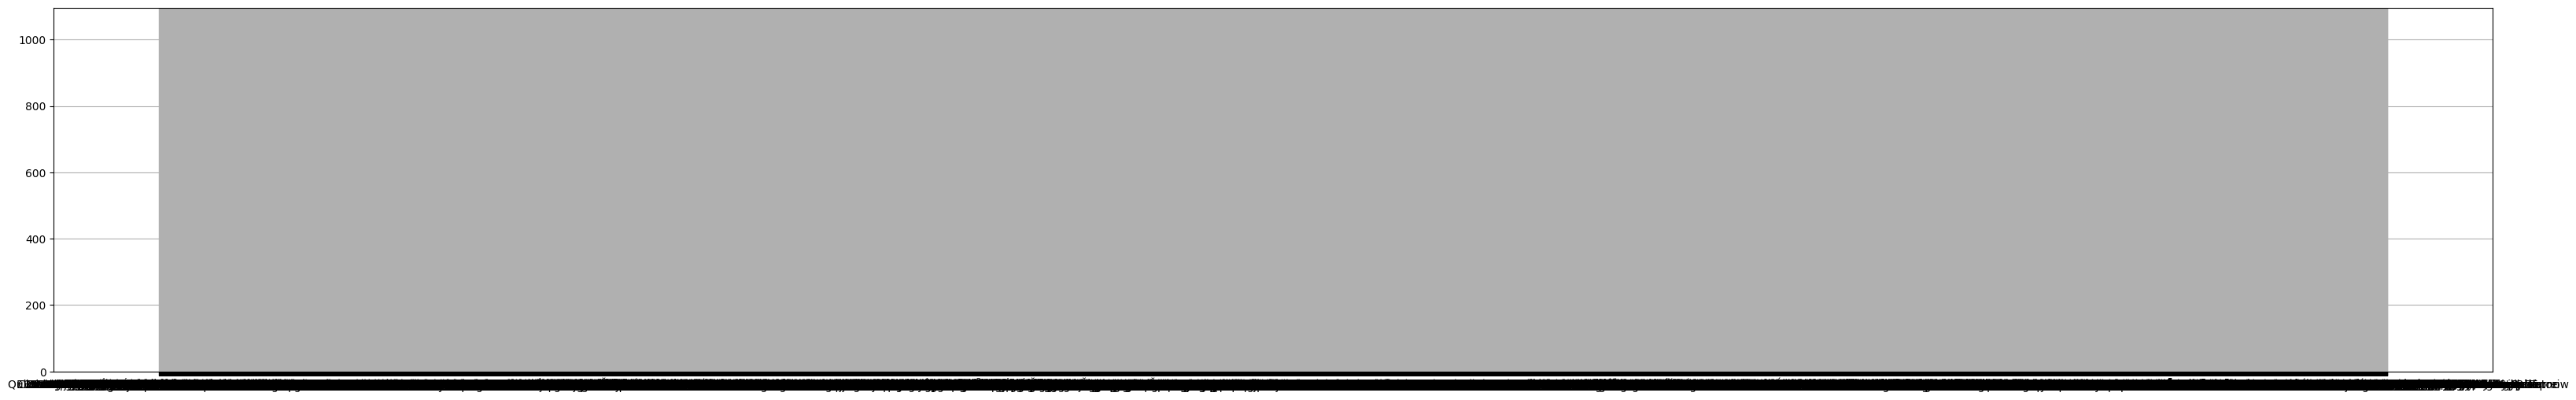

In [671]:
sportsbetting["Event"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(40, 6)

Note:

- "Event" column contains 19.067 different entries. A graph is not useful in this case.

#### - "Event Date"

In [672]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

<Axes: >

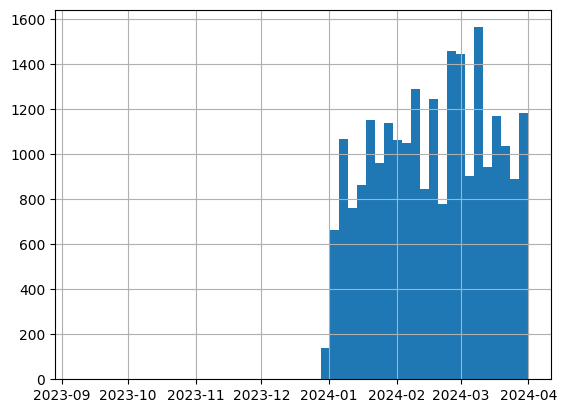

In [673]:
sportsbetting["Event_Date"].hist(bins=50)

Note:

- The DataFrame contains information for 90 days, specifically from the first quarter of 2024.

#### - "Time"

In [674]:
sportsbetting["Time"].value_counts()

16:00:00    1391
18:00:00    1278
19:00:00    1230
20:45:00    1018
20:00:00     973
            ... 
16:47:00       1
03:21:00       1
01:57:00       1
01:43:00       1
08:20:00       1
Name: Time, Length: 456, dtype: int64

Note:

- Most of the games take place between 16:00 and 21:00.

## Null Values & Treatment

In [675]:
sportsbetting.isnull().sum().sum()                                

1310

In [676]:
(sportsbetting.isnull().sum()/len(sportsbetting)*100).round(2)       

Sport            0.00
Wager            0.00
Paid             0.00
Winnings         0.00
Hold             0.00
Purchase_Time    0.00
Competition      0.00
Event            0.00
Event_Date       0.00
Time             5.55
Sport_Group      0.00
dtype: float64

In [677]:
sportsbetting.isnull().sum()

Sport               0
Wager               0
Paid                0
Winnings            0
Hold                0
Purchase_Time       0
Competition         0
Event               0
Event_Date          0
Time             1310
Sport_Group         0
dtype: int64

In [678]:
px.imshow(sportsbetting.isnull(), title="Heatmap of null values in sportsbetting", template="plotly_dark")       

Notes:

- Only the column "Time" has null values. 
- This is missing information which, in this case, represents 5.5% of the data in the column. 
- This column will not be used in the analysis and is therefore removed. 

In [679]:
sportsbetting=sportsbetting.drop(columns=["Time"])          # Although the percentage of null values in this column is not high, 
                                                            # this column does not provide information that will be used later in this analysis 
                                                            # and for this reason it is deleted

In [680]:
sportsbetting.head(2)                                       # Check of implemented changes

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball

## Correlation

### Numerical variables ("Wager", "Paid", "Winnings", "Hold")

Notes:

- As the variables do not follow a Gaussian distribution, Spearman or Kendall will provide better data than Pearson.
- There is a moderate positive correlation between "Winnings" and "Hold" (0.52) and between "Wager" and Winnings" (0.5). The relationship between Hold and Winnings, or Wager and Winnings, is weak.
- The strongest correlation is the negative (inverse) correlation between "Paid" and "Hold" (-0.97). The more you pay, the less the company earns.

In [700]:
numeric_variables=sportsbetting.select_dtypes(include=['float64', 'int64']).columns

In [701]:
correlation_matrix = sportsbetting[numeric_variables].corr(method="spearman")                
correlation_matrix

Wager      Paid  Winnings      Hold
Wager     1.000000  0.367112  0.497449 -0.244922
Paid      0.367112  1.000000 -0.449077 -0.966260
Winnings  0.497449 -0.449077  1.000000  0.523051
Hold     -0.244922 -0.966260  0.523051  1.000000

#### Heat Map (Comparision between Spearman, Kendall & Pearson)

In [693]:
px.imshow(sportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\826331543.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [682]:
px.imshow(sportsbetting.corr("kendall").round(2), text_auto=True, title="Kendall Correlation between numerical variables",      
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\1114973596.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [704]:
px.imshow(sportsbetting.corr("pearson").round(2), text_auto=True, title="Kendall Correlation between numerical variables",      
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\2011365565.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Test between numeric columns

In [705]:
from scipy.stats import spearmanr

stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.449, p=0.000
Probably dependent


In [686]:
stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.367, p=0.000
Probably dependent


In [687]:
stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Hold"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.966, p=0.000
Probably dependent


In [688]:
stat, p_value = spearmanr(sportsbetting["Hold"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.245, p=0.000
Probably dependent


In [689]:
stat, p_value = spearmanr(sportsbetting["Hold"], sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.523, p=0.000
Probably dependent


In [690]:
stat, p_value = spearmanr(sportsbetting["Winnings"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.497, p=0.000
Probably dependent


Note:

- All are probably dependants.

### Object variables ("Sport", "Purchase_time", "Competition", "Event","Sport_Group")

In [708]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball

#### Label encode

In [712]:
from sklearn.preprocessing import LabelEncoder

sportsbetting_encoded=sportsbetting.copy()
columns_to_encode = ["Sport", "Purchase_Time", "Competition", "Event", "Sport_Group"]
label_encoder = LabelEncoder()
for col in columns_to_encode:
    sportsbetting[col+"_encoded"] = label_encoder.fit_transform(sportsbetting[col])

sportsbetting_encoded.head(2)


Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  Sport_encoded  \
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball              3   
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball              3   

   Purchase_Time_encoded  Competition_encoded  Event_encoded  \
0                      1                  504           1186   
1                      1                  504           1188   

   Sport_Group_encoded  
0                    0  
1                    0

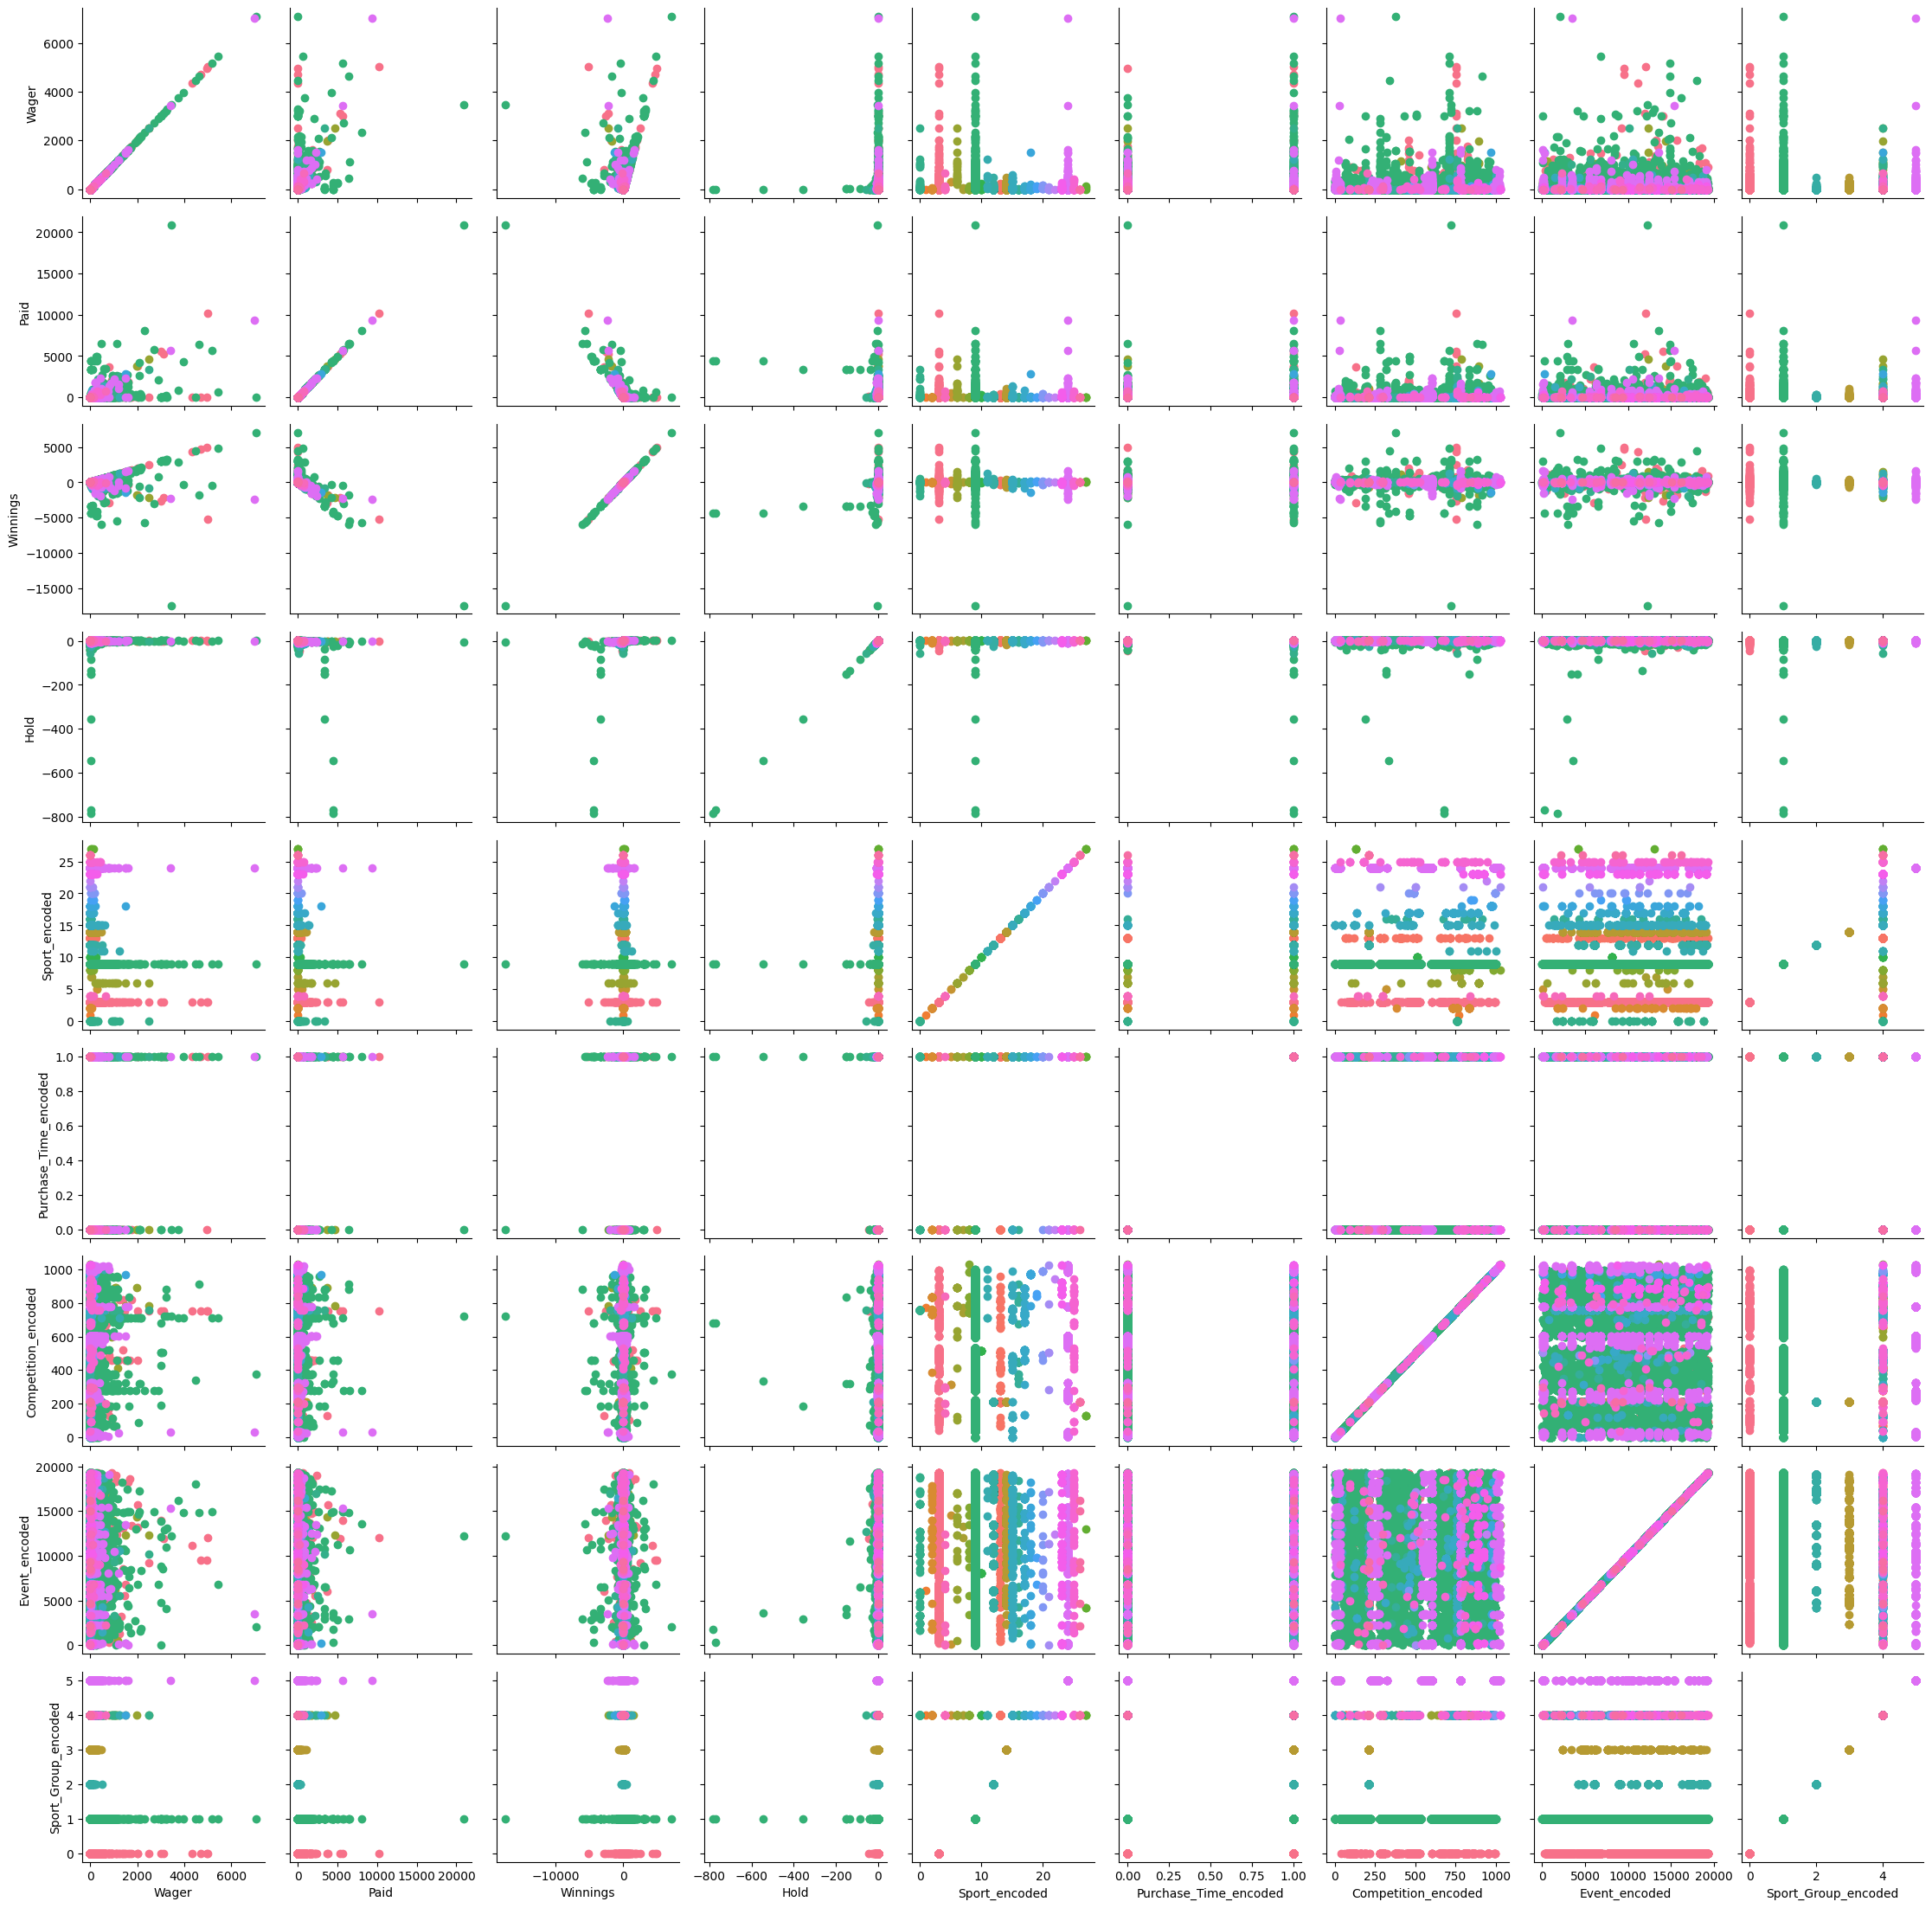

In [713]:
g=sns.PairGrid(sportsbetting_encoded, hue="Sport")
g.map(plt.scatter)

In [728]:
px.imshow(sportsbetting_encoded.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=800)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\3474178293.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Notes:

- There is a strong correlation between "Sport" and "Sport_Group"
- There is no moderate or strong correlation between any of the original numerical variables and the coded variables.

In [735]:
stat, p_value = spearmanr(sportsbetting_encoded["Wager"], sportsbetting_encoded["Event_encoded"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.024, p=0.000
Probably dependent


## Outliers

In [737]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Baloncesto   1.00   0.0      1.00   1.0     Unchecked  Germany Bundesliga   
1  Baloncesto  42.52   0.0     42.52   1.0     Unchecked  Germany Bundesliga   

                                 Event Event_Date Time  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN

In [738]:
sportsbetting.iloc[:,0:8]

Sport  Wager  Paid  Winnings  Hold Purchase_Time  \
0      Baloncesto   1.00   0.0      1.00   1.0     Unchecked   
1      Baloncesto  42.52   0.0     42.52   1.0     Unchecked   
2      Baloncesto   7.03   0.0      7.03   1.0     Unchecked   
3      Baloncesto   4.20   0.0      4.20   1.0       Checked   
4      Baloncesto   2.50   0.0      2.50   1.0       Checked   
...           ...    ...   ...       ...   ...           ...   
23602   Waterpolo   0.26   0.0      0.26   1.0     Unchecked   
23603   Waterpolo   0.16   0.0      0.16   1.0     Unchecked   
23604   Waterpolo   0.30   0.0      0.30   1.0       Checked   
23605   Waterpolo   0.16   0.0      0.16   1.0     Unchecked   
23606   Waterpolo   0.26   0.0      0.26   1.0     Unchecked   

                          Competition                                Event  
0                  Germany Bundesliga           Alba Berlín - BG Gottingen  
1                  Germany Bundesliga  Alba Berlín - EWE Baskets Oldenburg  
2                  Germany Bundesliga         Alba Berlín - Ratiopharm Ulm  
3                  Germany Bundesliga     Alba Berlin - S. Oliver Wurzburg  
4                  Germany Bundesliga           Baskets Bonn - Alba Berlin  
...                               ...                                  ...  
23602   Campeonato del Mundo Femenino                China - Nueva Zelanda  
23603   Campeonato del Mundo Femenino             Reino Unido - Kazajistán  
23604  Campeonato del Mundo Masculino                      Grecia - Italia  
23605  Campeonato del Mundo Masculino                    Hungría - Francia  
23606  Campeonato del Mundo Masculino                     Serbia - Croacia  

[23607 rows x 8 columns]

In [278]:
np.percentile(sportsbetting.iloc[:,0:8], [25, 75]) 

array([  0.6, 150. ])

In [ ]:
outliers=sportsbetting.copy()

In [288]:
outliers=sportsbetting.copy()
# Iteramos sobre cada columna del DataFrame
for col in outliers.columns:
    # Calculamos los percentiles 25 y 75 (Q1 y Q3) -- ¿recordáis lo que son en un boxplot?
    Q1 = outliers[col].quantile(0.25)
    Q3 = outliers[col].quantile(0.75)

    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calculamos los límites del intervalo
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazamos los valores atípic    os por los límites del  (el upper si está por encima, el lower si está por debajo)
    outliers[col] = outliers[col].apply(lambda x: x>lower_limit and x<upper_limit)   #True estaaá dentro, es ok, False está fuera de estos límites y no está ok


In [308]:
outliers

Sport  Wager  Paid  Winnings  Hold  Purchase Time  Competition  Event  \
0      False   True  True      True  True           True         True   True   
1      False   True  True     False  True           True         True   True   
2      False   True  True      True  True           True         True   True   
3      False   True  True      True  True           True         True   True   
4      False   True  True      True  True           True         True   True   
...      ...    ...   ...       ...   ...            ...          ...    ...   
23602  False   True  True      True  True           True         True   True   
23603  False   True  True      True  True           True         True   True   
23604  False   True  True      True  True           True         True   True   
23605  False   True  True      True  True           True         True   True   
23606  False   True  True      True  True           True         True   True   

       Event Date  
0            True  
1            True  
2            True  
3            True  
4            True  
...           ...  
23602        True  
23603        True  
23604        True  
23605        True  
23606        True  

[23607 rows x 9 columns]

In [315]:
# outliers['Wager'] + outliers['Paid']

# # Si deseas sumar todas las columnas en el DataFrame, puedes hacerlo de la siguiente manera:
outliers["total"]=outliers[["Wager","Paid","Winnings","Hold"]].sum(axis=1)


In [318]:
outliers.head(2)

Sport  Wager  Paid  Winnings  Hold  Purchase Time  Competition  Event  \
0  False   True  True      True  True           True         True   True   
1  False   True  True     False  True           True         True   True   

   Event Date  total  
0        True      4  
1        True      3

In [330]:
sportsbetting["Sport"][outliers["total"]==0].value_counts()

Fútbol              641
Baloncesto          228
Tenis               112
Caballos             30
Galgos               28
Fútbol Americano     14
Balonmano            14
Cricket              13
Voleibol              8
Hockey Hielo          6
Tenis de Mesa         5
Loteria               3
Rugby Union           3
MMA                   2
Voley Playa           2
Fórmula 1             1
Boxeo                 1
Name: Sport, dtype: int64

In [331]:
sportsbetting["Sport"][outliers["total"]==1].value_counts()

Fútbol              1122
Baloncesto           212
Galgos               147
Tenis                108
Caballos              48
Fútbol Americano      10
Tenis de Mesa          9
Loteria                8
Balonmano              7
Hockey Hielo           7
Voleibol               3
Cricket                2
Béisbol                2
Fútbol Sala            2
Voley Playa            2
Golf                   1
MMA                    1
Name: Sport, dtype: int64

In [329]:
sportsbetting["Sport"][outliers["total"]<2].value_counts()

Fútbol              1763
Baloncesto           440
Tenis                220
Galgos               175
Caballos              78
Fútbol Americano      24
Balonmano             21
Cricket               15
Tenis de Mesa         14
Hockey Hielo          13
Loteria               11
Voleibol              11
Voley Playa            4
MMA                    3
Rugby Union            3
Fútbol Sala            2
Béisbol                2
Fórmula 1              1
Boxeo                  1
Golf                   1
Name: Sport, dtype: int64

In [328]:
sportsbetting["Sport"][outliers["total"]<2].value_counts().sum()

2802

In [295]:
outliers["Wager","Paid"].sum()

KeyError: ('Wager', 'Paid')

In [293]:
(outliers.sum()/len(outliers)).round(2)

Sport            0.00
Wager            0.84
Paid             0.78
Winnings         0.76
Hold             0.78
Purchase Time    1.00
Competition      1.00
Event            1.00
Event Date       1.00
dtype: float64

## Test varios

## Normalización

Gráficos

Top ten deportes, top ten últimos....

## Regression model--- hold

Qué deportes dan más ganancias

## Classification model---Purchase_Time

un deporte, qué da más ganancias, apuestas live o prematch (el hold es distinto pq cambia con el volumen de apuestas)